In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns 
import math
import re
import operator
import numpy as np

In [2]:
df = pd.read_csv('Austin_Animal_Center_Intakes.csv')
df.head(3)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White


In [3]:
df.shape

(134888, 12)

## Data Cleaning
<div class="alert alert-block alert-success">
<span style="color:black">

Prior to analysis, the dataframe is cleaned and prepared. This includes the following:
- Dropping unnecessary columns
- Renaming columns
- Checking for missing values
- Checking for duplicate values 
- Ensuring correct data types
   
    </span>
    </div> 

In [4]:
# Here unnecessary columns are dropped from the data set. 
df.drop('MonthYear', inplace=True, axis=1)
df.head(3)

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White


In [5]:
# Here spaces are removed from the column names to aid in later querying. 
for x in df.columns:
    df.rename(columns={f'{x}':f'{x.replace(" ", "")}'}, inplace=True)
    
df.head()

,AnimalID,Name,DateTime,FoundLocation,IntakeType,IntakeCondition,AnimalType,SexuponIntake,AgeuponIntake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [6]:
# Here columns are renamed to more simple names. 
df.rename(columns={'DateTime':'Date','IntakeCondition':'Condition',
                   'FoundLocation':'Location', 'IntakeType':'Intake', 'AnimalType':'Animal',
                   'SexuponIntake':'Sex', 'AgeuponIntake':'Age'}, inplace=True)
df.head(2)

,AnimalID,Name,Date,Location,Intake,Condition,Animal,Sex,Age,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver


In [7]:
# Here the columns are checked for missing values. 
# Since Name and Sex columns won't be used much for analysis, we will leave the values as-is. 
df.isna().sum()

AnimalID         0
Name         40729
Date             0
Location         0
Intake           0
Condition        0
Animal           0
Sex              1
Age              0
Breed            0
Color            0
dtype: int64

In [8]:
# Here the Animal ID column is tested to see if each row represents a unique value. 
# Since the value is false, there are duplicate ID's in the column. 
df['AnimalID'].is_unique

False

In [9]:
# All of the duplicates for the Animal ID and Date columns are printed here.
# Some Animal ID's represent duplicates, 
# while others represent animals who were taken into the Animal Center multiple times. 

duplicates = df[df.duplicated(subset=['AnimalID', 'Date'], keep=False)]
print(duplicates)

       AnimalID      Name                    Date  \
3490    A830075    Waffle  03/02/2021 01:35:00 PM   
3491    A830075    Waffle  03/02/2021 01:35:00 PM   
6652    A696688      Mari  02/10/2015 11:00:00 AM   
6653    A696688      Mari  02/10/2015 11:00:00 AM   
8696    A727043    *Larry  05/17/2016 03:46:00 PM   
8697    A727043    *Larry  05/17/2016 03:46:00 PM   
11361   A761936       NaN  11/12/2017 11:16:00 AM   
11362   A761936       NaN  11/12/2017 11:16:00 AM   
15054   A561806     Dasia  06/05/2017 11:36:00 AM   
15055   A561806     Dasia  06/05/2017 11:36:00 AM   
25221   A811566     Bubby  01/05/2020 09:13:00 PM   
25733   A773428   *Atreyu  05/31/2018 06:38:00 PM   
25734   A773428   *Atreyu  05/31/2018 06:38:00 PM   
28620   A719747     Layla  02/12/2021 09:51:00 PM   
42777   A815987  Princess  04/09/2020 03:32:00 PM   
42778   A815987  Princess  04/09/2020 03:32:00 PM   
49997   A735395       Owl  09/23/2016 12:00:00 PM   
49998   A735395       Owl  09/23/2016 12:00:00

In [10]:
# Here the dataframe is updated so that duplicate values are dropped. 
df.drop_duplicates(subset=['AnimalID', 'Date'], inplace=True)
df.shape

(134864, 11)

In [11]:
# Here the Date column is converted to date time to aid in analysis. 
df['Date'] = pd.to_datetime(df['Date'])

## Unique Values by Category Type

<div class="alert alert-block alert-success">
<span style="color:black">

Here are the unique values for each categorical field of the data set.  
</span> 
</div>

In [12]:
df['Intake'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request', 'Abandoned'], dtype=object)

In [13]:
df['Sex'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [14]:
df['Condition'].unique()

array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', 'Aged',
       'Medical', 'Other', 'Neonatal', 'Feral', 'Behavior', 'Med Urgent',
       'Space', 'Med Attn', 'Panleuk'], dtype=object)

In [15]:
df['Animal'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

In [16]:
df['Breed'].unique()

array(['Beagle Mix', 'English Springer Spaniel', 'Basenji Mix', ...,
       'Whippet/English Pointer', 'Pointer/Siberian Husky',
       'Cane Corso/Pit Bull'], dtype=object)

In [17]:
df.query('Animal == "Other"')['Breed'].unique()

array(['Bat', 'Bat Mix', 'Hamster Mix', 'Raccoon', 'Raccoon Mix',
       'Rabbit Sh Mix', 'Skunk Mix', 'Cinnamon', 'Rabbit Sh', 'Opossum',
       'Skunk', 'Dutch/Angora-Satin', 'Fox', 'Rat', 'Guinea Pig Mix',
       'Ferret', 'Cold Water', 'Rat Mix', 'Opossum Mix', 'Guinea Pig',
       'Rex', 'Snake/Python', 'Lop-Mini/Hotot', 'Lizard', 'Californian',
       'Silver Mix', 'Cold Water Mix', 'Squirrel Mix', 'Ferret Mix',
       'Rex Mix', 'Hedgehog', 'Sugar Glider', 'Rex-Mini Mix', 'Fox Mix',
       'Mouse', 'Hamster', 'Lionhead', 'Hotot', 'Turtle Mix',
       'American Mix', 'Squirrel', 'Turtle', 'Armadillo Mix', 'Coyote',
       'Angora-French Mix', 'Rabbit Lh', 'Lop-Amer Fuzzy', 'Havana Mix',
       'Californian Mix', 'Tortoise', 'Snake', 'Dutch', 'Lop-Mini Mix',
       'Lop-English Mix', 'Netherlnd Dwarf Mix', 'Lizard Mix',
       'Armadillo', 'Bobcat Mix', 'Coyote Mix', 'Hotot Mix',
       'Lop-Holland', 'Rabbit Lh Mix', 'Gerbil', 'Chinchilla Mix',
       'Lionhead Mix', 'New Zealand

In [18]:
df['Color'].unique()

array(['Tricolor', 'White/Liver', 'Sable/White', 'Calico', 'Tan/Gray',
       'Chocolate', 'Black', 'Brown Tabby', 'Black/White', 'Cream Tabby',
       'White/Tan', 'Brown/White', 'Brown Tabby/White', 'Torbie',
       'Tan/White', 'Tortie', 'Blue/White', 'Brown/Cream', 'Brown',
       'White/Black', 'Blue', 'White', 'Black/Red', 'Brown Brindle/White',
       'Gray Tabby', 'Tan', 'Chocolate/Brown', 'White/Gray', 'Black/Gray',
       'Brown Merle', 'Orange Tabby', 'White/Blue', 'Sable/Tan',
       'Brown/Black', 'Black/Tricolor', 'Black/Brown Brindle',
       'Gray/Black', 'Blue Tabby', 'Yellow', 'White/Cream',
       'Cream Tabby/White', 'Red/White', 'Black/Tan', 'Black/Brown',
       'Brown/Yellow', 'White/Brown', 'Gray', 'Orange Tabby/White',
       'Brown Tiger/White', 'Brown Tabby/Black', 'Chocolate/White',
       'Tan/Black', 'Chocolate/Tan', 'White/Brown Tabby', 'Buff/White',
       'Cream', 'Tricolor/Brown', 'Gray/White', 'Gray/Yellow',
       'Fawn/White', 'Red Tick', 'Blue Tabb

# Average Daily Intake by Category

<div class="alert alert-block alert-success">
<span style="color:black">
For the course of the entire data set, stray animal intakes, intakes of normal condition, and dogs had the highest average daily intake. 

## Intake Type
- <b>Stray</b>: about 31 average daily intakes 
- <b>Owner Surrender</b>: about 9 average daily intakes 
- <b>Public Assist</b>: about 2 average daily intakes 

## Intake Condition
- <b>Normal</b>: about 39 average daily intakes 
- <b>Injured</b>: about 3 average daily intakes 
- <b>Sick</b>: about 2 average daily intakes 

## Animal Type
- <b>Dog</b>: about 25 average daily intakes 
- <b>Cat</b>: about 17 average daily intakes 
- <b>Other</b>: about 2 average daily intakes 
</span>
</div>

In [19]:
def counting(pdf, col):
    """ Returns a list of the average number of daily intakes of animals under unique category in a column."""
    
    finlist = []
    category = pdf[col]
    for x in category.unique():
        categoryf = pdf[category == x]
        dataf = categoryf.set_index('Date')
        dailynumer = dataf.groupby(pd.Grouper(freq='D'))['AnimalID'].count()
        finlist.append(x + " " + str(round(dailynumer.mean(), 2)))
    print(finlist)

In [20]:
# Here are average daily intakes by intake type. 
counting(df, 'Intake')

['Stray 30.95', 'Owner Surrender 9.19', 'Public Assist 2.7', 'Wildlife 1.74', 'Euthanasia Request 0.09', 'Abandoned 0.91']


In [20]:
# Here are average daily intakes by intake condition. 
counting(df, 'Condition')

['Normal 38.7', 'Sick 1.92', 'Injured 2.5', 'Pregnant 0.03', 'Nursing 1.37', 'Aged 0.15', 'Medical 0.19', 'Other 0.08', 'Neonatal 0.96', 'Feral 0.04', 'Behavior 0.05', 'Med Urgent 0.12', 'Space 2.0', 'Med Attn 0.03', 'Panleuk 1.0']


In [21]:
# Here are average daily intakes by animal type. 
counting(df, 'Animal')

['Dog 25.21', 'Cat 17.06', 'Other 2.38', 'Bird 0.21', 'Livestock 0.01']


# Total Intake by Category
<div class="alert alert-bock alert-success">
<span style="color:black">
    
Stray animals, animals of normal condition, and non-neutered male animals consisted of the majority of animal intakes. Fun Fact: the most common name among named animals was Max (612 intakes)! Other popular names incuded Bella (560), Luna (558), Rocky (414), and Daisy (396). 

## Intake Type
- <b>Stray</b>: about 69% of all intakes (93,028 intakes total)
- <b>Owner Surrender</b>: about 20% of all intakes (27,613 intakes total)
- <b>Public Assist</b>: about 6% of all intakes (8,099 intakes total)

## Intake Condition
- <b>Normal</b>: about 86% of all intakes (116,330 intakes total)  
- <b>Injured</b>: about 6% of all intakes (7,520 intakes total)
- <b>Sick</b>: about 4% of all intakes (5,771 intakes total)

## Sex
- <b>Intact Male</b>: about 33% of all intakes (44,290 intakes total)  
- <b>Intact Female</b>: about 31% of all intakes (42,046 intakes total)
- <b>Neutered Male</b>: about 15% of all intakes (20,395 intakes total)
- <b>Spayed Female</b>: about 13% of all intakes (17,330 intakes total)
</span>
</div>

In [21]:
# Here are total intakes by intake type. 
intaketype = df[['Intake', 'AnimalID']].groupby(by='Intake').count().sort_values('AnimalID', ascending=False)[:5]
intaketype.rename(columns={'AnimalID':'Count'}, inplace=True)
intaketype

,Count
Intake,
Stray,93028
Owner Surrender,27613
Public Assist,8099
Wildlife,5218
Abandoned,648


In [22]:
def add_percent(data, column):
    percentages = []
    for x in data[column]:
        percentages.append((x/134864)*100)
    return percentages

In [23]:
intaketype['Percent_Total'] = add_percent(intaketype, 'Count')
intaketype

,Count,Percent_Total
Intake,,
Stray,93028,68.979120
Owner Surrender,27613,20.474700
Public Assist,8099,6.005309
Wildlife,5218,3.869083
Abandoned,648,0.480484


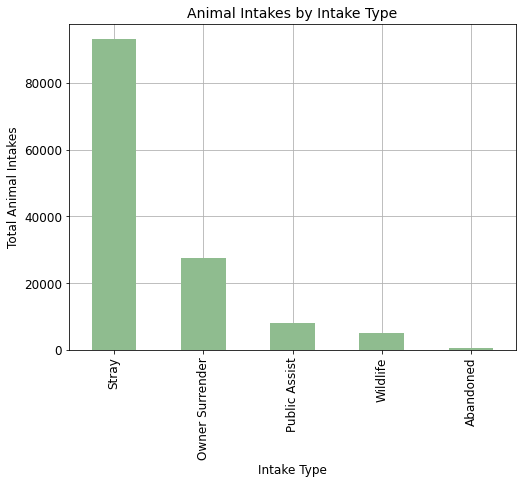

In [74]:
intaketype.plot(kind='bar', y='Count', legend='', color='DarkSeaGreen', figsize=(8,6), fontsize=12)

plt.title('Animal Intakes by Intake Type', size=14)
plt.xlabel('Intake Type', fontsize=12)
plt.ylabel('Total Animal Intakes', fontsize=12)
plt.rc('axes', axisbelow=True)
plt.grid(True, clip_on=True)

In [25]:
# Here are total intakes by intake condition. 
intakecondition = df[['Condition', 'AnimalID']].groupby(by='Condition').count().sort_values('AnimalID', ascending=False)[:5]
intakecondition.rename(columns={'AnimalID':'Count'}, inplace=True)
intakecondition

,Count
Condition,
Normal,116330
Injured,7520
Sick,5771
Nursing,3932
Aged,457


In [26]:
intakecondition['Percent_Total'] = add_percent(intakecondition, 'Count')
intakecondition

,Count,Percent_Total
Condition,,
Normal,116330,86.257267
Injured,7520,5.575988
Sick,5771,4.279126
Nursing,3932,2.915530
Aged,457,0.338860


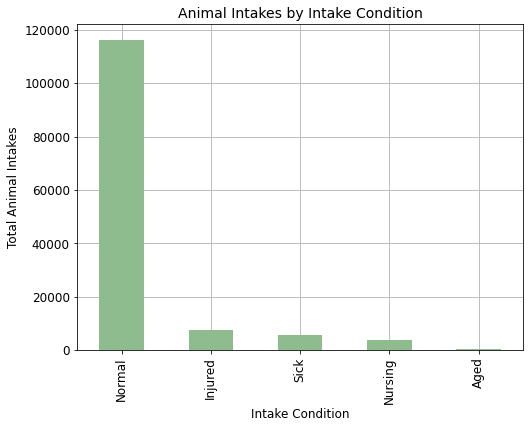

In [75]:
intakecondition.plot(kind='bar', y='Count', legend='', color='DarkSeaGreen', figsize=(8,6), fontsize=12)

plt.title('Animal Intakes by Intake Condition', size=14)
plt.xlabel('Intake Condition', fontsize=12)
plt.ylabel('Total Animal Intakes', fontsize=12)
plt.grid(True, clip_on=True)

In [76]:
# Here are total intakes by sex. 
sex = df[['Sex', 'AnimalID']].groupby(by='Sex').count().sort_values('AnimalID', ascending=False)[:5]
sex.rename(columns={'AnimalID':'Count'}, inplace=True)
sex

,Count
Sex,
Intact Male,44290
Intact Female,42046
Neutered Male,20395
Spayed Female,17330
Unknown,10802


In [29]:
sex['Percent_Total'] = add_percent(sex,'Count')
sex

,Count,Percent_Total
Sex,,
Intact Male,44290,32.840491
Intact Female,42046,31.176593
Neutered Male,20395,15.122642
Spayed Female,17330,12.849982
Unknown,10802,8.009550


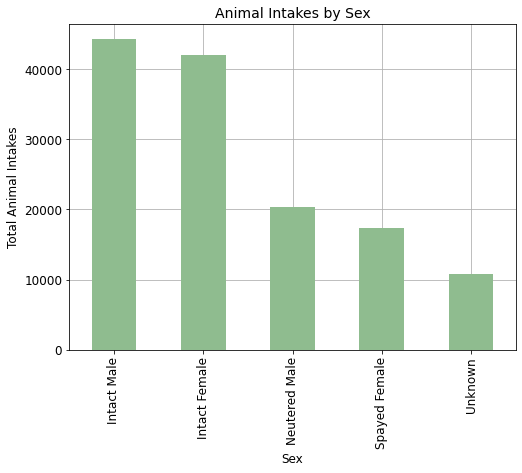

In [77]:
sex.plot(kind='bar', y='Count', legend='', color='DarkSeaGreen', figsize=(8,6), fontsize=12)

plt.title('Animal Intakes by Sex', size=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Total Animal Intakes', fontsize=12)
plt.grid(True, clip_on=True)

In [31]:
# Here are the most common names of named animals. 
names = df[['Name', 'AnimalID']].groupby(by='Name').count().sort_values('AnimalID',ascending=False)[:10]
names.rename(columns={'AnimalID':'Count'}, inplace=True)
names

,Count
Name,
Max,612
Bella,560
Luna,558
Rocky,414
Daisy,396
Coco,350
Princess,343
Charlie,342
Lucy,333


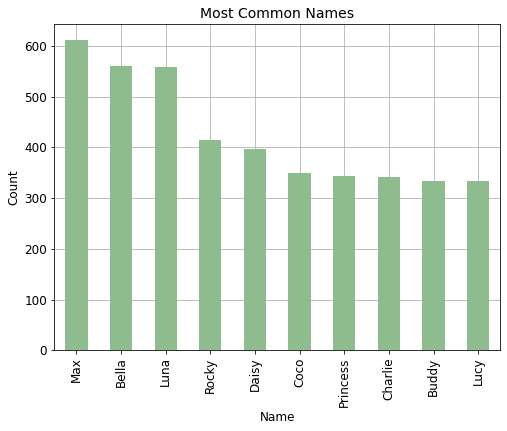

In [78]:
df.groupby(by='Name')['AnimalID'].count().sort_values(ascending=False)[:10].plot(kind='bar', 
                                                                                 figsize=(8,6), color='DarkSeaGreen',
                                                                                fontsize=12)
plt.title('Most Common Names', size=14)
plt.xlabel('Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, clip_on=True)

# Date and Time Data

<div class="alert alert-block alert-success">
<span style="color:black">

The data set spans from October 1, 2013 to December 23, 2021. For the purpose of analysis, we have set the start of the COVID-19 pandemic on March 15, 2020. The pandemic day with the most intakes was June 15th, 2021, with 85 intakes. The prepandemic day with the most animal intakes was July 9th, 2014, with 140 animal intakes. 
    
Prior to the pandemic, animal intakes tended to spike between June and July. Intakes also took a downwards trend between the fall and winter, presumably due to the holiday season, winter vacations, and/or inclement weather. The pandemic followed the same general pattern. 

    
</span>
</div>

In [33]:
# Here is the most recent date of the data set. 
df['Date'].max()

Timestamp('2021-12-23 16:51:00')

In [34]:
# Here is the earliest date of the data set.
df['Date'].min()

Timestamp('2013-10-01 07:51:00')

In [35]:
# Here is the day of the pandemic with the most animal intakes. 
pandemic = df[(df['Date'] >= '3/15/2020')]
pandemic_dt = pandemic.set_index('Date')
pandemic_dt.groupby(pd.Grouper(freq='D'))['AnimalID'].count().sort_values(ascending=False)[:1]

Date
2021-06-15    85
Name: AnimalID, dtype: int64

In [36]:
# Here is the pre-pandemic day with the most animal intakes. 
prepandemic = df[df['Date'] < '3/15/2020']
prepandemic_dt = prepandemic.set_index('Date')
prepandemic_dt.groupby(pd.Grouper(freq='D'))['AnimalID'].count().sort_values(ascending=False)[:1]

Date
2014-07-09    140
Name: AnimalID, dtype: int64

Text(0.5, 0, 'Intake Date')

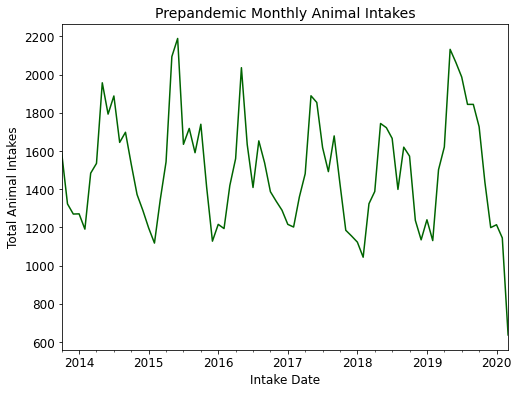

In [37]:
prepandemic_graph = prepandemic_dt.groupby(pd.Grouper(freq='M'))['AnimalID'].count()
prepandemic_graph.plot(color='DarkGreen', figsize=(8,6), fontsize=12)

plt.title('Prepandemic Monthly Animal Intakes', size=14)

plt.ylabel('Total Animal Intakes', fontsize=12)
plt.xlabel('Intake Date', fontsize=12)


Text(0.5, 0, 'Intake Date')

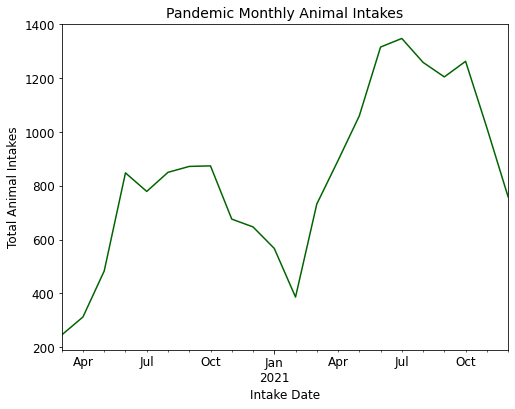

In [38]:
pandemic_graph = pandemic_dt.groupby(pd.Grouper(freq='M'))['AnimalID'].count()
pandemic_graph.plot(color='DarkGreen', figsize=(8,6), fontsize=12)

plt.title('Pandemic Monthly Animal Intakes', size=14)

plt.ylabel('Total Animal Intakes', fontsize=12)
plt.xlabel('Intake Date', fontsize=12)


In [39]:
# Here are the prepandemic days with the most stray animal intakes. 
prepandemic_dt.query('Intake == "Stray"').groupby(pd.Grouper(freq='D'))['AnimalID'].count().sort_values(ascending=False)[:5]

Date
2019-05-04    98
2014-05-12    94
2016-05-12    93
2016-04-30    87
2015-05-27    87
Name: AnimalID, dtype: int64

In [40]:
# Here are the pandemic days with the most stray animal intakes. 
pandemic_dt.query('Intake == "Stray"').groupby(pd.Grouper(freq='D'))['AnimalID'].count().sort_values(ascending=False)[:5]

Date
2021-06-01    56
2021-07-02    55
2021-08-02    55
2021-06-11    54
2021-09-21    51
Name: AnimalID, dtype: int64

In [41]:
# Here are the prepandemic days with the most owner surrender animal intakes. 
prepandemic_dt.query('Intake == "Owner Surrender"').groupby(pd.Grouper(freq='D'))['AnimalID'].count().sort_values(ascending=False)[:5]

Date
2016-09-23    73
2017-06-04    37
2015-10-29    36
2015-04-02    35
2019-05-20    33
Name: AnimalID, dtype: int64

In [42]:
# Here are the pandemic days with the most owner surrender animal intakes. 
pandemic_dt.query('Intake == "Owner Surrender"').groupby(pd.Grouper(freq='D'))['AnimalID'].count().sort_values(ascending=False)[:5]

Date
2021-08-26    39
2021-08-11    36
2021-11-02    32
2021-09-29    31
2021-12-02    31
Name: AnimalID, dtype: int64

# Most Common Combinations


<div class="alert alert-block alert-success">
<span style="color:black"> 
    
## Intake Type and Intake Condition
    
- The most common intake type and intake condition among Austin Animal Center animals during the ongoing COVID-19 pandemic was <b> Stray intakes in Normal condition </b>. A total of 8,020 Stray intakes of normal condition were taken in over the course of the pandemic, representing 44% of pandemic animal intakes. 
- Prior to the pandemic, <b> Stray intakes in Normal condition </b> were also the most common intake type and intake condition. A total of 71,901 Stray intakes of normal condition were taken in over the course of the entire dataset, representing 62% of intakes. 

## Animal Breed by Animal Type 
        
- The most common breed of animal among the Austin Animal Center animals during the ongoing COVID-19 pandemic was <b> Domestic Shorthair Cats </b>. A total of 5,070 Domestic Shorthair Cats were taken in over the course of the pandemic, representing 28% of pandemic animal intakes. 
- Over the course of the entire dataset, <b> Domestic Shorthair Cats </b> were also the most common intake type and intake condition. A total of 31,944 Domestic Shorthair Cats were taken in over the course of the entire dataset, representing 24% of intakes. 
    
</span>
</div>
   

In [43]:
# Here are the top ten combinations of intake type and condition during the pandemic.

pd.pivot_table(pandemic, index=['Intake', 'Condition'], values='AnimalID', aggfunc='count', margins=True).sort_values('AnimalID', ascending=False)[:11]

AnimalID
Intake          Condition          
All                           18391
Stray           Normal         8020
Owner Surrender Normal         4245
Stray           Injured        1417
Public Assist   Normal          884
Stray           Sick            863
                Nursing         590
Abandoned       Normal          441
Wildlife        Normal          367
                Sick            236
Owner Surrender Sick            228

In [44]:
math.ceil((8020/18391) * 100)

44

In [45]:
# Here are the top ten combinations of intake type and condition prior to the pandemic.

pd.pivot_table(prepandemic, index=['Intake', 'Condition'], values='AnimalID', aggfunc='count', margins=True).sort_values('AnimalID', ascending=False)[:11]

AnimalID
Intake          Condition          
All                          116473
Stray           Normal        71901
Owner Surrender Normal        21297
Public Assist   Normal         6591
Stray           Injured        4415
                Nursing        2743
Wildlife        Normal         2438
Stray           Sick           2213
Wildlife        Sick           1185
                Injured         768
Owner Surrender Sick            725

In [46]:
math.ceil((71901/116473) * 100)

62

In [47]:
# Here are the counts of animal intakes by breed during the pandemic.

pd.pivot_table(pandemic, index=['Animal', 'Breed'], values='AnimalID', aggfunc='count', margins=True).sort_values('AnimalID', ascending=False)[:11]

AnimalID
Animal Breed                           
All                               18391
Cat    Domestic Shorthair          5070
       Domestic Shorthair Mix      1558
Dog    Pit Bull                     850
       Labrador Retriever Mix       696
       Pit Bull Mix                 613
       Chihuahua Shorthair          467
Other  Bat                          455
Cat    Domestic Medium Hair         434
Dog    Labrador Retriever           385
       German Shepherd              369

In [49]:
math.ceil((5070/18397) * 100)

28

In [50]:
# Here are the counts of animal intakes by breed prior to the pandemic.

pd.pivot_table(prepandemic, index=['Animal', 'Breed'], values='AnimalID', aggfunc='count', margins=True).sort_values('AnimalID', ascending=False)[:11]

AnimalID
Animal Breed                              
All                                 116473
Cat    Domestic Shorthair Mix        30379
Dog    Pit Bull Mix                   8204
       Labrador Retriever Mix         6564
       Chihuahua Shorthair Mix        6131
Cat    Domestic Shorthair             5084
       Domestic Medium Hair Mix       3058
Dog    German Shepherd Mix            2871
Other  Bat Mix                        1754
Cat    Domestic Longhair Mix          1515
Dog    Australian Cattle Dog Mix      1446

In [51]:
math.ceil((30379/116473) * 100)

27

# Data on Sick and Injured Animals
<div class="alert alert-block alert-success">
<span style="color:black"> 
    
Sick and injured animals were primarily represented among cats, dogs, and raccoons.  
- <b>Cats</b>: Domestic Shorthair Mix, 2,673 total; Domestic Shorthair, 1,644 total.    
- <b>Dogs</b>: Pit Bull Mix, 719 total; Chihuahua Shorthair Mix, 552 total.  
- <b>Raccoons</b>: Raccoon Mix, 486 total; Raccoon, 427 total.  
    
## Intake Type
    
- <b>Strays</b>: 8,908 total  
- <b>Wildlife</b>: 2,347 total  
- <b>Owner surrender</b>: 1,504 total  

## Location
    
- A few of the most common locations where stray and injured animals were found within Austin city limits were 4434 Frontier Trail, 12034 Research Blvd, and 7201 Levander Loop.  
    
</span>
</div>

In [52]:
# Here a dataframe is made for only animals whose intake condition is sick or injured. 

sick_inj = df.query('Condition == "Sick" or Condition == "Injured"')
sick_inj.head(3)

,AnimalID,Name,Date,Location,Intake,Condition,Animal,Sex,Age,Breed,Color
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
10,A774147,NaN,2018-06-11 07:45:00,6600 Elm Creek in Austin (TX),Stray,Injured,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Black/White
16,A743114,NaN,2017-02-04 10:10:00,208 Beaver St in Austin (TX),Stray,Injured,Cat,Intact Female,2 years,Domestic Shorthair Mix,Black/White


In [53]:
# Here are the top breeds of sick and injured animals. 

sick_inj.groupby(by=['Animal', 'Breed'])['AnimalID'].count().sort_values(ascending=False)[:10]

Animal  Breed                   
Cat     Domestic Shorthair Mix      2673
        Domestic Shorthair          1644
Dog     Pit Bull Mix                 719
        Chihuahua Shorthair Mix      552
Other   Raccoon Mix                  486
        Raccoon                      427
Dog     Labrador Retriever Mix       401
Cat     Domestic Medium Hair Mix     323
Other   Bat Mix                      319
        Bat                          271
Name: AnimalID, dtype: int64

In [54]:
# Here are the top intake types of sick and injured animals. 

sick_inj.groupby(by='Intake')['AnimalID'].count().sort_values(ascending=False)[:10]

Intake
Stray                 8908
Wildlife              2347
Owner Surrender       1504
Public Assist          373
Euthanasia Request     125
Abandoned               34
Name: AnimalID, dtype: int64

In [55]:
# Here are the top location where sick and injured animals were found. 

sick_inj.groupby(by='Location')['AnimalID'].count().sort_values(ascending=False)[:15]

Location
Austin (TX)                           1284
4434 Frontier Trail in Austin (TX)     191
Outside Jurisdiction                    89
Travis (TX)                             88
4434 Frontier Trl in Austin (TX)        73
12034 Research Blvd in Austin (TX)      58
7201 Levander Loop in Austin (TX)       57
7619 Scenic Brook in Austin (TX)        49
12034 Research in Austin (TX)           46
Manor (TX)                              45
4434 Frontier in Austin (TX)            34
Del Valle (TX)                          33
Pflugerville (TX)                       18
4106 N Lamar in Austin (TX)             18
4106 N Lamar Blvd in Austin (TX)        16
Name: AnimalID, dtype: int64

# Data on Age of Intake

<div class="alert alert-block alert-success">
<span style="color:black">

The youngest animal intake was about 1 day old, while the oldest was about 10,950 days—or 30 years. The average age was about 744 days—or 2 years. Among intake types, euthanasia requests, public assists, and ownder surrenders had the highest average age. Among intake conditions, aged, med urgent, and "other" had the highest average age.  

## Age by Animal Type
-<b>Dog</b>: 3 years  
-<b>Bird</b>: 2 years  
-<b>Cat</b>: 2 years  
-<b>Other</b>: 2 years  
-<b>Livestock</b>: 1 year  
    
## Intake Type
-<b>Euthanasia Request</b>: 8 years  
-<b>Public Assist</b>: 4 years  
-<b>Owner Surrender</b>: 3 years   
-<b>Stray</b>: 2 years  
-<b>Wildlife</b>: 2 years  
    
## Intake Condition
-<b>Aged</b>: 12 years  
-<b>Med Urgent</b>: 8 years  
-<b>Other</b>: 4 years  
-<b>Medical</b>: 3 years  
-<b>Behavior</b>: 3 years     
    
</span>
</div>

In [56]:
# For the ages with 0 (ex. 0 years, 0 months, 0 weeks), we will replace the number '0' 
# with the number '1' to help estimate the age and perform larger calculations on age. 

df['Age'] = [re.sub("^0", "1", x) for x in df['Age']]
df.head()

,AnimalID,Name,Date,Location,Intake,Condition,Animal,Sex,Age,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [57]:
def age_days(pdf, column):
    
    """ This function converts age in the format ## days, ## weeks,
    ## months, and ## years to age in number of days. Each age is converted to
    an integer that represents number of days. """
    
    a_days = []
    for age in pdf[column]:
        num, time = age.split(' ', 1)
    
        if operator.contains(time, "day"):
            a_days.append(int(num) * 1)
        elif operator.contains(time, "week"):
            a_days.append(int(num) * 7)
        elif operator.contains(time, "month"):
            a_days.append(int(num) * 30)
        elif operator.contains(time, "year"):
            a_days.append(int(num) * 365)
        else:
            continue
            
    return a_days

In [58]:
# Here the age in the original format of the data is converted to age in days. 

df['AgeDays'] = age_days(df, 'Age')
df.head(3)

,AnimalID,Name,Date,Location,Intake,Condition,Animal,Sex,Age,Breed,Color,AgeDays
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,730
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,2920
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,330


In [59]:
# Here ages with negative numbers (ex. -2 years, -730 days) 
# that represent less than a specific age (ex. < 2 years, < 730 days)
# are made positive and halfed to represent an estimate (ex. -2 years is estimated at 1 year or 365 days). 

replacer = []

for x in df['AgeDays']:
    if x < 0:
        newnum = x/2
        replacer.append(abs(newnum))
    else:
        replacer.append(x)

df['AgeDays'] = replacer
df.head()

,AnimalID,Name,Date,Location,Intake,Condition,Animal,Sex,Age,Breed,Color,AgeDays
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,730.0
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,2920.0
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,330.0
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,28.0
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,1460.0


In [60]:
df['AgeDays'].describe()

count    134864.000000
mean        744.013758
std        1044.267329
min           1.000000
25%          60.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: AgeDays, dtype: float64

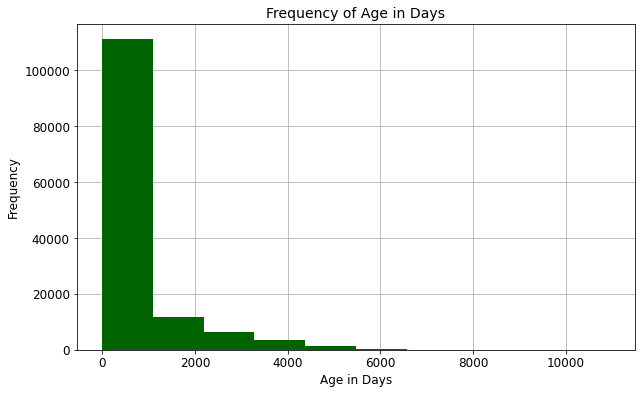

In [79]:
df['AgeDays'].plot(kind='hist', figsize=(10,6), color='DarkGreen', fontsize=12)
plt.title('Frequency of Age in Days', size=14)
plt.xlabel('Age in Days', size=12)
plt.ylabel('Frequency', size=12)
plt.grid(True)

In [62]:
# Here is the estimated average age by animal type. 

animal_age = df[['Animal', 'AgeDays']].groupby(by='Animal').mean().sort_values('AgeDays', ascending=False)[:10]
animal_age

,AgeDays
Animal,
Dog,942.549920
Bird,521.196513
Cat,491.790005
Other,469.853073
Livestock,299.291667


In [63]:
# Here the estimated average age by animal type is converted to years. 

avg_year = []
for x in animal_age['AgeDays']:
    avg_year.append(math.ceil(x/365))

animal_age['AgeYears'] = avg_year
animal_age

,AgeDays,AgeYears
Animal,,
Dog,942.549920,3
Bird,521.196513,2
Cat,491.790005,2
Other,469.853073,2
Livestock,299.291667,1


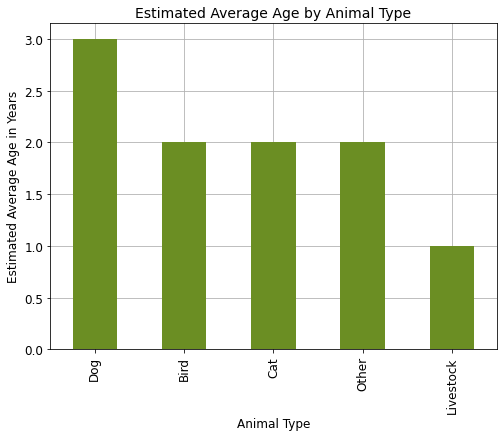

In [80]:
animal_age.plot(kind='bar', y='AgeYears', legend='', color='OliveDrab', figsize=(8,6), fontsize=12)

plt.title('Estimated Average Age by Animal Type', size=14)
plt.xlabel('Animal Type', fontsize=12)
plt.ylabel('Estimated Average Age in Years', fontsize=12)
plt.grid(True, clip_on=True)

In [65]:
# Here is the estimated average age by intake type. 

intake_age = df[['Intake', 'AgeDays']].groupby(by='Intake').mean().sort_values('AgeDays', ascending=False)[:10]
intake_age

,AgeDays
Intake,
Euthanasia Request,2907.647287
Public Assist,1214.823497
Owner Surrender,947.734944
Stray,653.550866
Wildlife,482.229398
Abandoned,412.091049


In [66]:
# Here the estimated average age by intake type is converted to years. 

avg_year_int = []
for x in intake_age['AgeDays']:
    avg_year_int.append(math.ceil(x/365))

intake_age['AgeYears'] = avg_year_int
intake_age

,AgeDays,AgeYears
Intake,,
Euthanasia Request,2907.647287,8
Public Assist,1214.823497,4
Owner Surrender,947.734944,3
Stray,653.550866,2
Wildlife,482.229398,2
Abandoned,412.091049,2


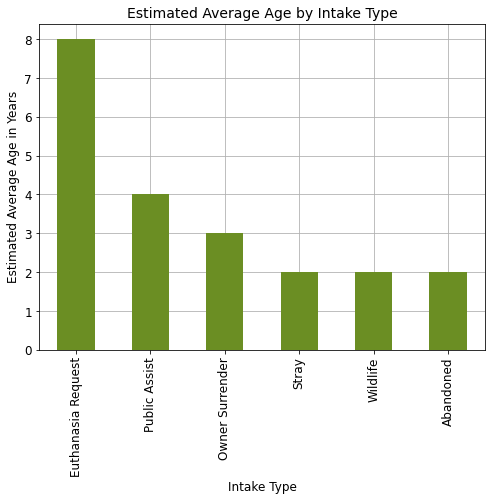

In [81]:
intake_age.plot(kind='bar', y='AgeYears', legend='', color='OliveDrab', figsize=(8,6), fontsize=12)

plt.title('Estimated Average Age by Intake Type', size=14)
plt.xlabel('Intake Type', fontsize=12)
plt.ylabel('Estimated Average Age in Years', fontsize=12)
plt.grid(True, clip_on=True)

In [68]:
# Here is the estimated average age by intake condition

condition_age = df[['Condition', 'AgeDays']].groupby(by='Condition').mean().sort_values('AgeDays', ascending=False)[:10]
condition_age

,AgeDays
Condition,
Aged,4248.118162
Med Urgent,2737.500000
Other,1157.469136
Medical,1031.477124
Behavior,960.813953
Injured,940.116489
Sick,847.484145
Pregnant,766.260000
Normal,734.140338


In [69]:
# Here the estimated age by intake condition is converted to years

avg_year_con = []
for x in condition_age['AgeDays']:
    avg_year_con.append(math.ceil(x/365))

condition_age['AgeYears'] = avg_year_con
condition_age

,AgeDays,AgeYears
Condition,,
Aged,4248.118162,12
Med Urgent,2737.500000,8
Other,1157.469136,4
Medical,1031.477124,3
Behavior,960.813953,3
Injured,940.116489,3
Sick,847.484145,3
Pregnant,766.260000,3
Normal,734.140338,3


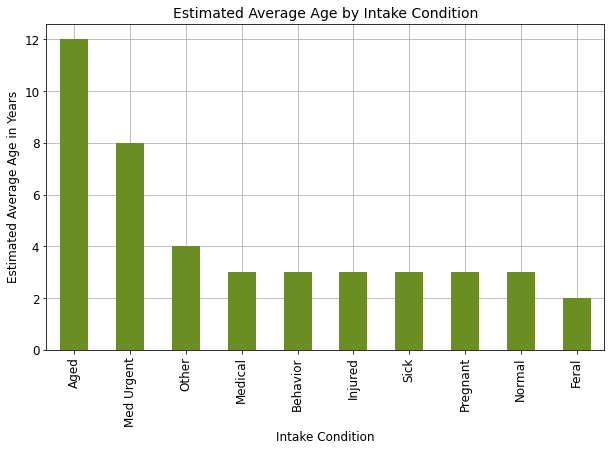

In [82]:
condition_age.plot(kind='bar', y='AgeYears', legend='', color='OliveDrab', figsize=(10,6), fontsize=12)

plt.title('Estimated Average Age by Intake Condition', size=14)
plt.xlabel('Intake Condition', fontsize=12)
plt.ylabel('Estimated Average Age in Years', fontsize=12)
plt.grid(True, clip_on=True)